<a href="https://colab.research.google.com/github/whyeon92/6th-Intermediate/blob/Week2/Week2_%EC%BA%90%EA%B8%80%ED%95%84%EC%82%AC_%EC%A1%B0%EC%8A%B9%EC%97%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#구글 코랩 환경 사용으로 드라이브 마운트 및 디렉터리 설정
from google.colab import drive
drive.mount('/content/gdrive/')

path = "/content/gdrive/My Drive/EuronData/"

Mounted at /content/gdrive/


# INTRODUCTION
- Deep learning: 데이터로부터 직접적으로 피처를 학습하는 머신러닝 방법 중 하나  
- Why deep learning:
데이터의 크기가 증가하면서 머신러닝이 불충분한 성능을 보이고 딥러닝이 더 좋은 효과를 보였다!  
- What is amounth of big: 보통 백만개 이상이면 big amount of data라고 부른다~  
- Usage fields of deep learning: Speech 분석, 이미지 분류, NLP, 추천 시스템 등등
- ML, DL의 차이:
 - 머신러닝에 딥러닝이 포함됨
 - 머신러닝은 피처가 직접 주어져야함
 - 딥러닝은 데이터로부터 피처를 학습함

In [ ]:
#This Python 3 environment comes with many helpful analytics libraries installed
#It is defined by the kaggle/python docker image : https://github.com/kaggle/docker-python
#For example, here's several helpful packages to load in

import numpy as np #linear algbra 선형대수
import pandas as pd #data processing, csv file I/O ex) pd.read_csv 데이터 핸들링
import matplotlib.pyplot as plt
#Input data files are available in the "../input/" directory.
#For example, running this (by clicking run or pressing Shift + Enter) will list the files in the input directory
#import warnings
import warnings
#filter warnings
warnings.filterwarnings('ignore')
from subprocess import check_output
#print(check_output(['ls', '../input']).decode("utf8"))
#캐글 노트북 사용할 때 가능한 것 같고 코랩에서 진행해서 우선 주석처리했습니다!
#Any results you write to the current directory are saved as output.)

# Overview the Data Set

sign language digits data set 사용.
- 2062 개의 수화 숫자 이미지
- 0~9로 총 10개의 결과값
- 처음엔 간단히 0과 1만 사용
- 0의 인덱스 -> 204~408
- 1의 인덱스 -> 822~1027
- 딥러닝하기엔 너무 작은 데이터지만 해봅시다
- X는 이미지 array, Y는 결과값 0 또는 1

(-0.5, 63.5, 63.5, -0.5)

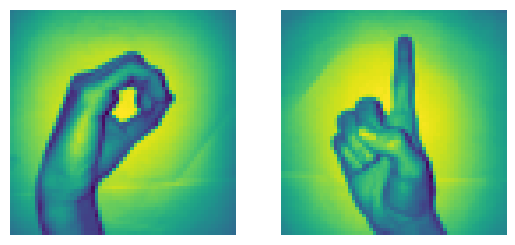

In [ ]:
#load data set
x_1 = np.load(path + 'X.npy')
Y_1 = np.load(path + 'Y.npy')
img_size = 64
plt.subplot(1, 2, 1)
plt.imshow(x_1[260].reshape(img_size, img_size))  #0의 이미지 출력
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(x_1[900].reshape(img_size, img_size))  #1의 이미지 출력
plt.axis('off')

In [ ]:
#Join a sequence of arrays along an row axis
X = np.concatenate((x_1[204:409], x_1[822:1027]), axis = 0)
#from 0 to 204 is zero sign
#from 205 to 410 is one sign 이 되게끔 x_1로부터 가져와서 X를 생성!
z = np.zeros(205)
o = np.ones(205)
Y = np.concatenate((z, o), axis = 0).reshape(X.shape[0], 1)
#z, o로 Y에 결과 label 생성해 저장
print('X shape: ', X.shape)
print('Y shape: ', Y.shape)

X shape:  (410, 64, 64)
Y shape:  (410, 1)


- 위의 코드 결과로 410은 이미지의 개수, 0 1 각각 205개씩!  
- 64*64는 이미지의 픽셀
- Y는 410개의 결과값
- test = 15% (근데 왜 트레인이... 85퍼가 아니고 75퍼지...?)
- random_state 지정

In [ ]:
#Then lets create x_train, y_train, x_test, y_test arrays
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, random_state = 42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]

X가 3차원 데이터이기 때문에 딥러닝 적용을 위해 이걸 2차원으로 만들어야함! (64, 64, 410)  
Y는 이미 2차원이라 그럴 필요 없음

In [ ]:
#X 2차원 변환
X_train_flatten = X_train.reshape(number_of_train, X_train.shape[1]*X_train.shape[2])
X_test_flatten = X_test.reshape(number_of_test, X_test.shape[1]*X_test.shape[2])
print('X train flatten', X_train_flatten.shape)
print('X test flatten', X_test_flatten.shape)

X train flatten (348, 4096)
X test flatten (62, 4096)


X train flatten (348, 4096) -> train이 4096개 픽셀의 346개 이미지  
X test flatten (62, 4096) -> test가 4096개 픽셀의 62개 이미지

In [ ]:
x_train = X_train_flatten.T
x_test = X_test_flatten.T
y_train = Y_train.T
y_test = Y_test.T
print('x train: ', x_train.shape)
print('x test: ', x_test.shape)
print('y train: ', y_train.shape)
print('y test: ', y_test.shape)

x train:  (4096, 348)
x test:  (4096, 62)
y train:  (1, 348)
y test:  (1, 62)


정리하자면 이 단계에선,
- 0과 1 레이블에 속하는 데이터를 가져왔다
- 데이터를 2차원으로 flatten  
의 과제를 했다!

# Logistic Regression

## Computation Graph 계산 그래프
: 계산 과정을 그래프로 하나하나 나타냄


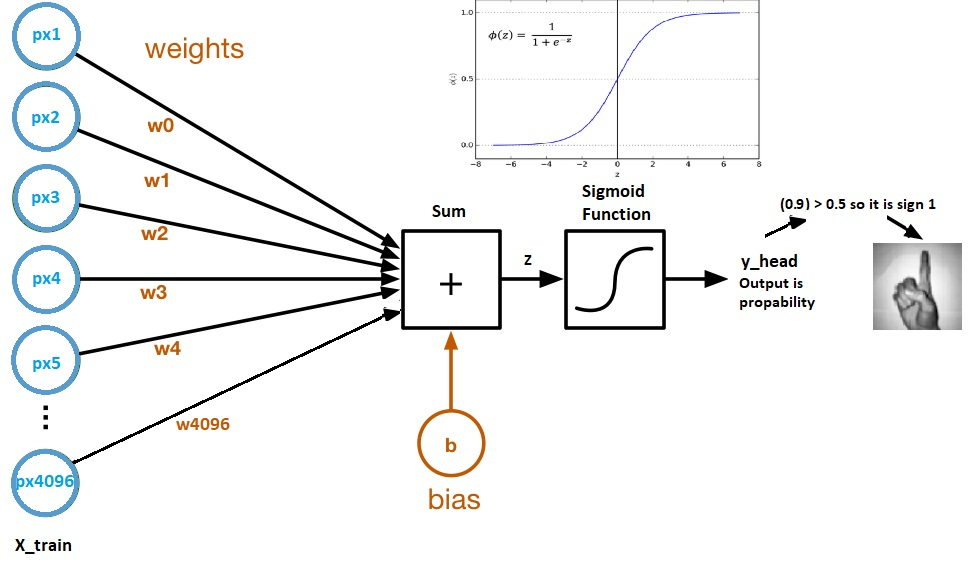

필사한 캐글페이지(https://www.kaggle.com/code/kanncaa1/deep-learning-tutorial-for-beginners/notebook#Overview-the-Data-Set)에서 가져옴.  
  
- Parameters : w(계수), b(intercept)  
- $z = w^T\cdot x + b = b + px_1w_1 + px_2w_2 + \cdots + px_{4096}w_{4096}$
- y_head = sigmoid(z)
- 시그모이드 함수를 통해 결과값이 0과 1 사이의 값이 나오게 만들기가 가능해짐.
- 왜 시그모이드를 쓰는가?
 - 결과가 0과 1 사이의 확률값
 - 추후 경사하강법에 사용가능

## Initializing parameters
- 각각의 이미지는 4096개의 픽셀을 가지고 각각의 픽셀은 그에따른 weight (= 계수)값을 가짐
- 첫 단계로 각 픽셀 값과 그 계수를 곱해줄 수 있다!
- ? 근데 그러면 계수를 고쳐나간다고 할때 제일 처음의 계수는 어떻게 정해지는가?
  - ANN에서 설명하겠지만 우선 여기선 0.01로 설정하겠다! (intercept는 0)

In [15]:
#short description and example of definition (Def)
def dummy(parameter):
  dummy_parameter = parameter + 5
  return dummy_parameter
result = dummy(3)  #-> result = 8

#lets initialize parameters
#So what we need is dimension 4096 that is number of pixels as a parameter for our initialize method(def)
def initialize_weights_and_bias(dimension):
  w = np.full((dimension, 1), 0.01)  #-> w의 모든 값을 0.01로 하는 (dimension, 1)크기의 행렬 생성
  b = 0.0
  return w, b

In [16]:
#w,b = initialize_weights_and_bias(4096)

## Forward Propagation (정방향.)
: pixel로부터 cost(비용함수)값을 얻기까지의 모든 step

In [17]:
#calculation of z
#z = np.dot(w.T, x_train)+b
def sigmoid(z):
    y_head = 1/(1 + np.exp(-z))
    return y_head

In [18]:
y_head = sigmoid(0)
y_head

0.5

손실함수는 다음과 같은 식으로 표현 가능하다  
$-(1-y) \log (1-\hat y) - y \log {\hat y}$  
잘못된 예측을 하면 손실함수 값은 당연히 커진다.  
비용함수는 손실함수 값의 총합!

In [19]:
#Forward propagation steps:
#find z = w.T*x+b
#y_head = sigmoid(z)
#loss(error) = loss(y, y_head)
#cost = sum(loss)
def forward_propagation(w, b, x_train, y_train):
  z = np.dot(w.T, x_train) + b
  y_head = sigmoid(z) #probabilistic 0-1
  loss = -y_train*np.log(y_head) - (1-y_train)*np.log(1-y_head)
  cost = (np.sum(loss))/x_train.shape[1]  #x_train.shape[1] is for scaling
  return cost

## Optimization Algorithm with Gradient Descent

: 비용함수가 최소가 되는 지점을 찾기 위해 w, b를 계속 업데이트해야한다. 이 방식이 바로 경사하강법.  
이 때 다음과 같은 식으로 w와 b를 업데이트 가능하다
$w := w - \alpha{\partial J(w, b) \over \partial w}, \ \ \ b := b - \alpha{\partial J(w, b) \over \partial b}$   
  
learning rate는 학습률로 너무 크면 비용함수 최저점을 지나칠 수 있고,  
너무 작으면 최저점을 찾기까지 너무 오랜 시간이 걸린다는 문제가 있음.

[backward propagation]  
역방향, -> w에 대한 비용함수의 미분 사용  
${\partial J \over \partial w} = {1 \over m }x(y_{head} - y)^T$  
${\partial J \over \partial b} = {1 \over m }\sum_{i=1}^mx(y_{head} - y)$   

In [20]:
#In backward propagation we will use y_head that found in forward progation
#Therefore instead of writing backward propagation method, lets combine forward propagation and backward propagation
def forward_backward_propagation(w, b, x_train, y_train):
    #forward propagation
    z = np.dot(w.T, x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1 - y_train)*np.log(1 - y_head)
    cost = (np.sum(loss))/x_train.shape[1]  # x_train.shape[1] is for scaling

    #backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] # x_train.shape[1]  is for scaling
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]   # x_train.shape[1]  is for scaling
    gradients = {"derivative_weight": derivative_weight, "derivative_bias": derivative_bias}
    return cost,gradients

In [21]:
#Updating(learning) parameters 파라미터 업데이트 함수
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    #updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion):  #for문 루프로 돌아가면서 업데이트
        #make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w, b, x_train, y_train)
        cost_list.append(cost)
        #lets update
        w = w - learning_rate * gradients["derivative_weight"]  #위의 업데이트 수식 코드화
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    #we update(learn) parameters weights and bias
    parameters = {"weight": w, "bias": b}
    plt.plot(index, cost_list2)
    plt.xticks(index, rotation = 'vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list
#parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate = 0.009,number_of_iterarion = 200)

In [22]:
#prediction
def predict(w,b,x_test):
    #x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T, x_test)+b)
    Y_prediction = np.zeros((1, x_test.shape[1]))
    #if z is bigger than 0.5, our prediction is sign one (y_head = 1),
    #if z is smaller than 0.5, our prediction is sign zero (y_head = 0),
    for i in range(z.shape[1]):
        if z[0, i] <= 0.5:
            Y_prediction[0, i] = 0
        else:
            Y_prediction[0, i] = 1

    return Y_prediction
#predict(parameters["weight"], parameters["bias"], x_test)

Cost after iteration 0: 14.014222
Cost after iteration 10: 2.544689
Cost after iteration 20: 2.577950
Cost after iteration 30: 2.397999
Cost after iteration 40: 2.185019
Cost after iteration 50: 1.968348
Cost after iteration 60: 1.754195
Cost after iteration 70: 1.535079
Cost after iteration 80: 1.297567
Cost after iteration 90: 1.031919
Cost after iteration 100: 0.737019
Cost after iteration 110: 0.441355
Cost after iteration 120: 0.252278
Cost after iteration 130: 0.205168
Cost after iteration 140: 0.196168


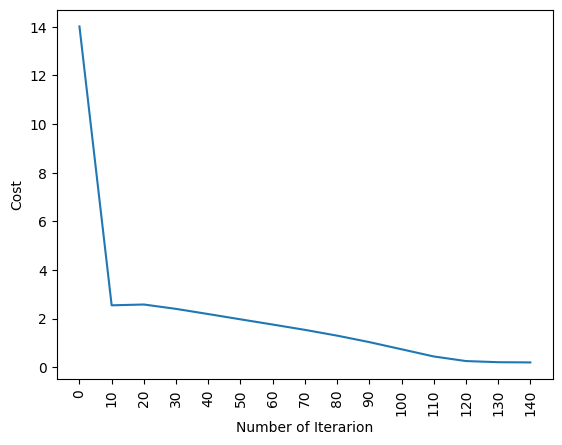

train accuracy: 92.816091954023 %
test accuracy: 93.54838709677419 %


In [23]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate,  num_iterations):
    #initialize
    dimension =  x_train.shape[0]   #that is 4096
    w,b = initialize_weights_and_bias(dimension)
    #do not change learning rate
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate, num_iterations)

    y_prediction_test = predict(parameters["weight"], parameters["bias"], x_test)
    y_prediction_train = predict(parameters["weight"], parameters["bias"], x_train)

    #Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))

logistic_regression(x_train, y_train, x_test, y_test, learning_rate = 0.01, num_iterations = 150)

반복수가 늘어날수록 비용함수가 줄어드는 것을 볼 수 있음!  
0-10 구간에서 비용함수가 훅 줄어든다~

## Logistic Regression with Sklearn

위에서 구현한 것과 달리 사이킷런 패키지로 쉽게 가져다 쓸 수도 있다~!

In [24]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(random_state = 42,max_iter = 150)
print("test accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)))
print("train accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))

test accuracy: 0.967741935483871 
train accuracy: 1.0 
